# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este documento apresenta uma solução para a previsão de renda de clientes de uma instituição financeira. Para alcançar esse objetivo, será analisada a relação entre a variável de renda e outros dados pessoais coletados desses clientes. A fim de estruturar essa análise, seguiremos os seguintes passos e métodos:

 * Reconhecimento e entendimento das variáveis;
 * Importação da base de dados;
 * Limpeza e tratamento dos dados importados;
 * Visualização das estatísticas dos dados utilizando ydata_profiling e tqdm;
 * Transformação dos dados por meio de métodos estudados, como numpy, pandas, encadeamento de métodos, listas, apply e assign;
 * Visualização das análises por meio de gráficos;
 * Implementação em uma página web utilizando streamlit e os.

## Etapa 2 Crisp-DM: Entendimento dos dados

|        Variável         |                       Descrição                             |    Tipo     |
| ----------------------- |:-----------------------------------------------------------:|------------:|
| data_ref                | Data de referência de coleta das variáveis                  | objetc      |
| id_cliente              | Código de identificação do cliente                          | int64       |
| sexo                    | Sexo do cliente                                             | object      |
| posse_de_veiculo        | Indica se o cliente possui veículo                          | bool        |
| posse_de_imovel         | Indica se o cliente possui imóvel                           | bool        |
| qtd_filhos              | Quantidade de filhos do cliente                             | int64       |
| tipo_renda              | Tipo de renda do cliente                                    | object      |
| educacao                | Grau de instrução do cliente                                | object      |
| estado_civil            | Estado civil do cliente                                     | object      |
| tipo_residencia         | Tipo de residência do cliente (própria, alugada, etc)       | object      |
| idade                   | Idade do cliente                                            | int64       |
| tempo_emprego           | Tempo no emprego atual                                      | float64     |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na residência               | float64     |
| renda                   | Renda em reais                                              | float64     |null  float64enda em reais

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red; font-size: 13px; font-style: italic">Obs.: houve uma mudança no nome do pacote pandas_profiling, agora ele se chama ydata_profiling </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

from ydata_profiling import ProfileReport
from tqdm import tqdm
from IPython.display import display, HTML

#import streamlit as st
import os

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')
print('Arquivo salvo com sucesso!')
gif_url = "https://media.licdn.com/dms/image/v2/D4D12AQGoqiEJdkoNkg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1709148637810?e=1747872000&v=beta&t=Ud8XyC2jS6mwt3iR8kCJDiagvtc7stauqFbMdTuv4sY"
display(HTML(f'<img src="{gif_url}" width="300px">'))

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Arquivo salvo com sucesso!


### Entendimento dos dados - Bivariadas




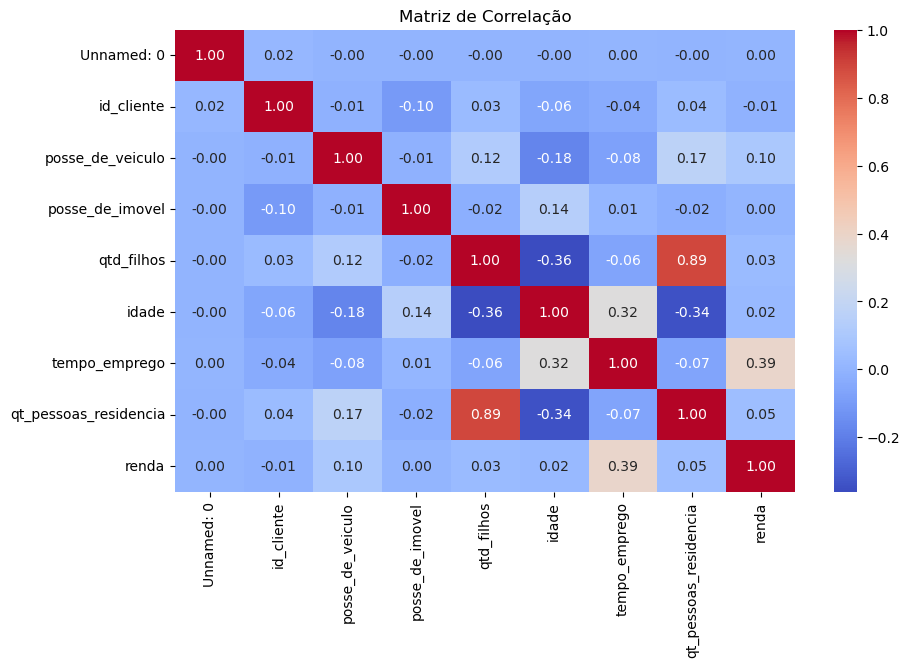

In [6]:
# Criação de heatmap para análise de relação entre variáveis
# a função corr() ignora osvalores nulos

plt.figure(figsize=(10,6))
sns.heatmap(renda.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

* O gráfico anterior apresenta a relação entre múltiplas variáveis. Quanto maior a correlação entre elas, mais próximo de 1 será o valor, e mais intenso será o tom vermelho no fundo dos quadros que representam essa correlação.
* Ao analisar esse gráfico, percebemos que as variáveis com as correlações mais fortes são:
<br>qtd_filhos x qtd_pessoas_residencia;
<br>tempo_emprego x renda e
<br>idade x tempo_emprego.

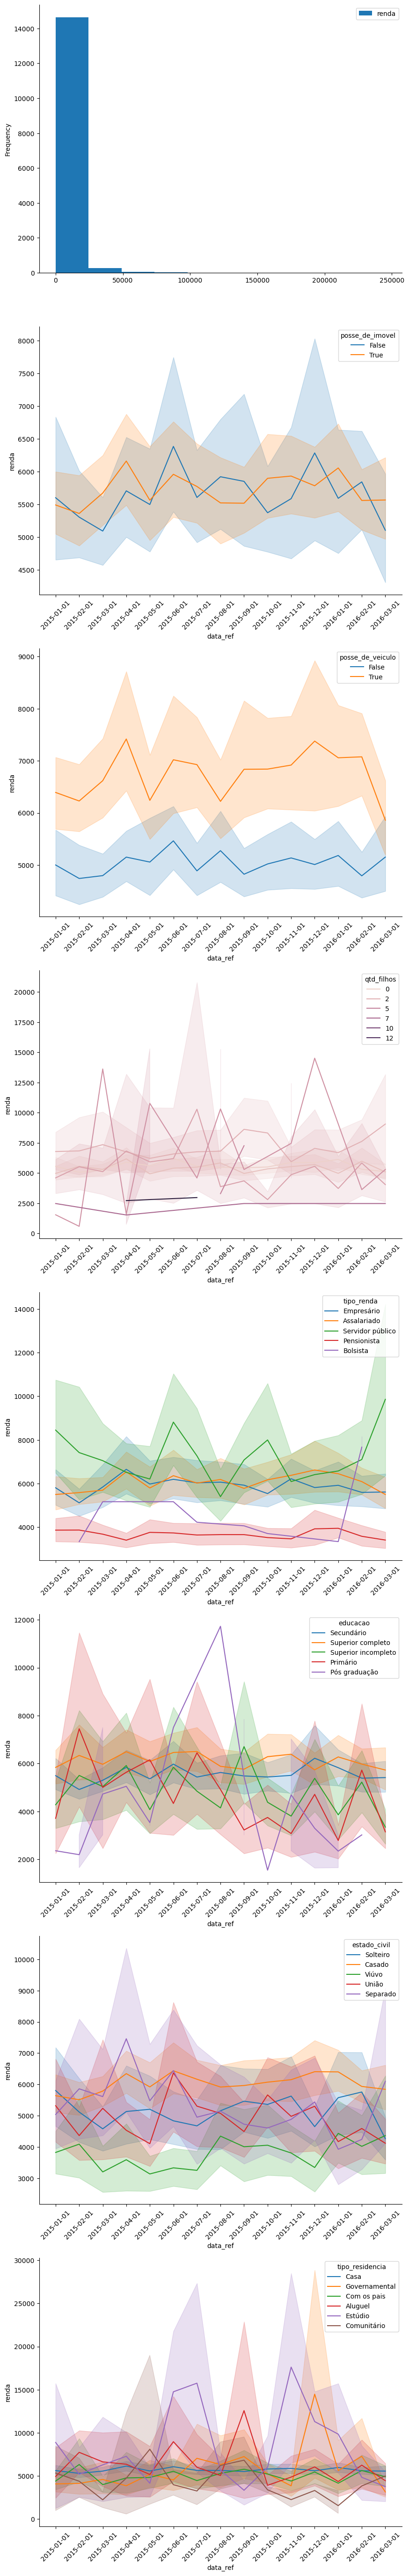

In [7]:
fig, ax = plt.subplots(8,1,figsize=(10,70))
renda[['posse_de_imovel','renda']].plot(kind='hist', ax=ax[0])
sns.lineplot(x='data_ref',y='renda', hue='posse_de_imovel',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='posse_de_veiculo',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='qtd_filhos',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='educacao',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='estado_civil',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_residencia',data=renda, ax=ax[7])
ax[7].tick_params(axis='x', rotation=45)
sns.despine()

Nota-se que em relação ao período de data de referência há periodicidade na variação dos resultado encontrados.

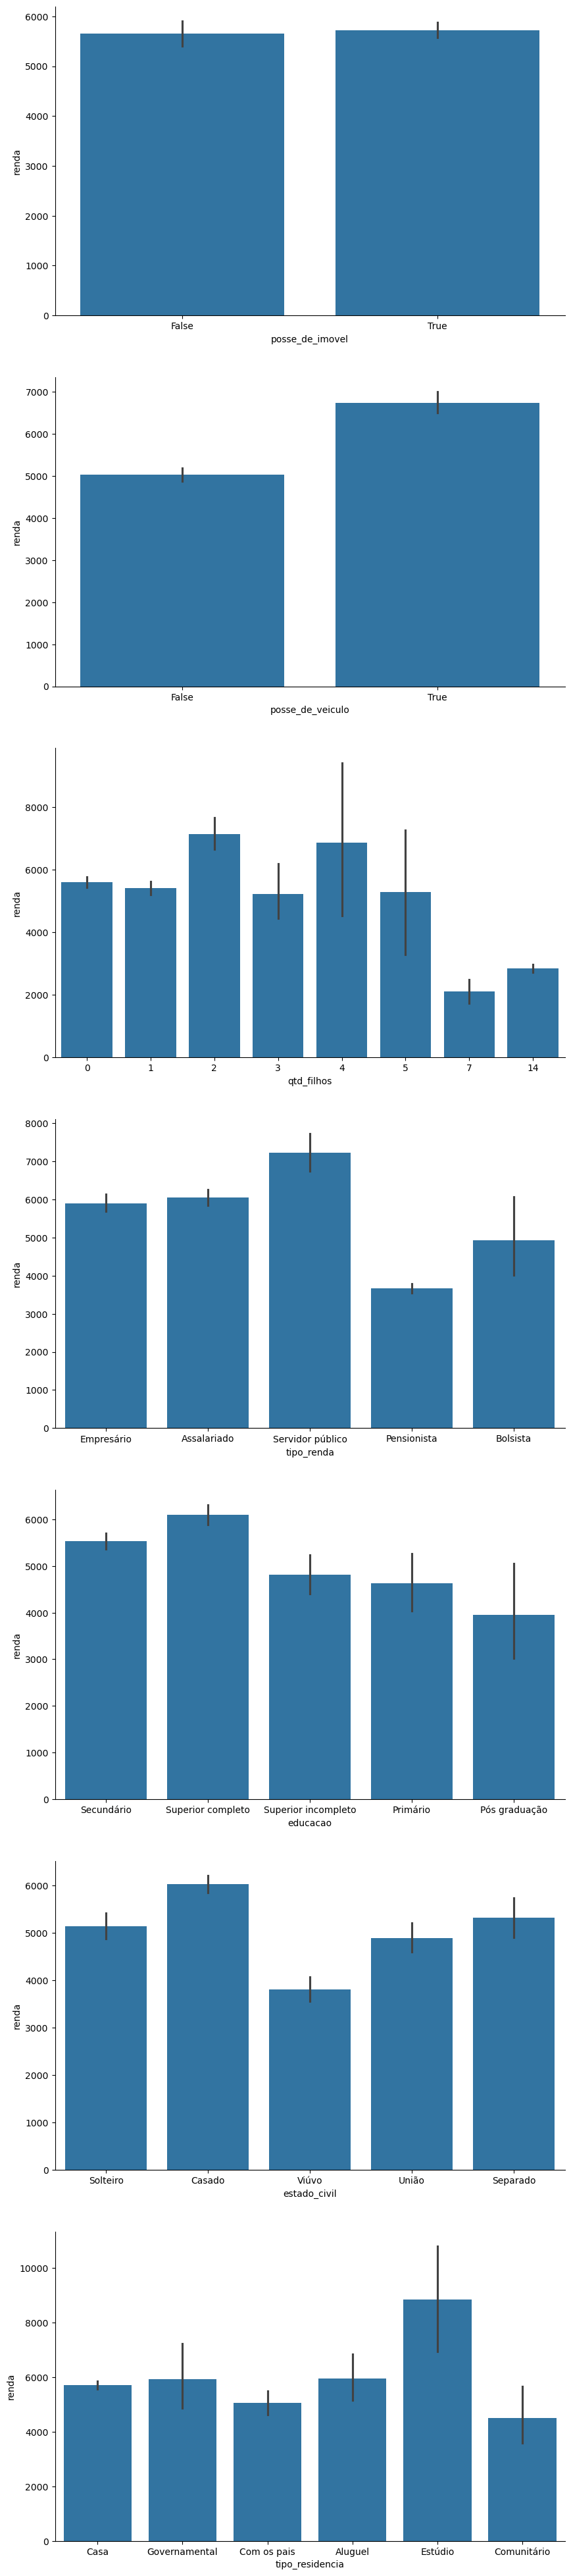

In [8]:
fig, ax = plt.subplots(7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
sns.despine()

Nos gráficos apresentados anteriormente, percebemos uma maior variação dos dados de renda em relação ao tipo_renda, educação e qtd_filhos.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [9]:
# Reduzindo o número de colunas da base de dados, desconsiderando as 3 primeiras colunas, que não tem interferência nos resultados de renda

renda = renda.drop(renda.columns[:3], axis = 1)
renda.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


In [10]:
# A análise apresentada no passo "Entendimento dos dados - Univariada" mostra que apenas a variável tempo_emprego tem valores em branco. 
# Para preencher esses valores faltosos de forma mais acertiva vou analisar quais os dados de tipo_renda esses valores acompanham

renda[renda["tempo_emprego"].isna()].nunique()

sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  4
tipo_renda                  1
educacao                    4
estado_civil                5
tipo_residencia             5
idade                      35
tempo_emprego               0
qt_pessoas_residencia       4
renda                    1680
dtype: int64

In [11]:
renda[renda["tempo_emprego"].isna()].head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
11,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,1685.51


In [12]:
# Vou preencher os valores do tempo de emprego em branco, com a média do valor em relação ao tipo de renda por idade
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['idade', 'tipo_renda'])['tempo_emprego'].transform('mean')
)

renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['tipo_renda'])['tempo_emprego'].transform('mean')
)

renda[renda["tempo_emprego"].isna()]

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda


In [13]:
# Construindo novas variáveis 
# 1. Tempo de emprego por idade (razão entre tempo_emprego e idade)
renda['tempo_emprego_por_idade'] = round(renda['tempo_emprego'] / renda['idade'], 2)

# 2. Renda per capta
renda['renda_per_capta'] = round(renda['renda']/ renda['qt_pessoas_residencia'], 2)

# 3. Renda por ano de emprego
renda['renda_por_tempo_emprego'] = round(renda['renda']/renda['tempo_emprego'], 2)

renda.head(2)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_por_idade,renda_per_capta,renda_por_tempo_emprego
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,0.25,8060.34,1220.76
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,0.26,926.08,257.83


In [14]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sexo                     15000 non-null  object 
 1   posse_de_veiculo         15000 non-null  bool   
 2   posse_de_imovel          15000 non-null  bool   
 3   qtd_filhos               15000 non-null  int64  
 4   tipo_renda               15000 non-null  object 
 5   educacao                 15000 non-null  object 
 6   estado_civil             15000 non-null  object 
 7   tipo_residencia          15000 non-null  object 
 8   idade                    15000 non-null  int64  
 9   tempo_emprego            15000 non-null  float64
 10  qt_pessoas_residencia    15000 non-null  float64
 11  renda                    15000 non-null  float64
 12  tempo_emprego_por_idade  15000 non-null  float64
 13  renda_per_capta          15000 non-null  float64
 14  renda_por_tempo_empreg

Os dados estão em formato útil.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Considerando os modelos estudados anteriormente, durante os módulos anteriores, com essa mesma base, temosos seguintes resultados para R²:
* Modelo de Patsy para o log(renda) ~ 0,157
* Modelo Ridge com alpha = 0 ~ 0,2682
* Modelo Lasso com alpha = 0 ~ 0,2682
* Modelo Stepwise ~ 0,2680
* Modelo de Lasso com ajuste de Árvore de Regressão ~ 0,3665
  
percebemos que o melhor modelo observado é o com ajuste de árvore de regressão. Então, usarei esse memso modelo nessa etapa.

### Rodando o modelo


In [15]:
# Separando as variáveis numéricas (num) e categóricas (cat), reduzindo a base as dados de interesse para o estudo:
cat = ['sexo','tipo_renda','educacao','estado_civil','tipo_residencia']
num = ['idade', 'tempo_emprego', 'qtd_filhos', 'tempo_emprego_por_idade', 'renda_per_capta', 'renda_por_tempo_emprego']

# Variáveis independentes, de interesse
X = renda[cat + num]
# Variável dependente
y = renda['renda']

# Convertendo todas as colunas booleanas para 0 e 1 automaticamente
bool_cols = X.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X[col] = X[col].replace({False: 0, True: 1}).astype(int)
    
# Retirando as colunas tipo object
X = pd.get_dummies(X, columns=cat, drop_first=True)
X = X.astype(float).dropna()

# Garantindo que as colunas numéricas sejam float
for col in num:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X[num] = X[num].fillna(X[num].mean())

# Garantindo que y seja numérico
y = pd.to_numeric(y, errors='coerce').fillna(y.mean())

# Escalando as variáveis numéricas
scaler = StandardScaler()
X[num] = scaler.fit_transform(X[num])

#Separando a base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Tamanho das bases
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")

Tamanho do conjunto de treinamento: 11250 linhas
Tamanho do conjunto de teste: 3750 linhas


In [16]:
# Lista de alphas para modelagem em Lasso
alpha = 0

print("\nResultados Lasso na base de testes:")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Alpha: {alpha}, R²: {r2:.4f}')


Resultados Lasso na base de testes:
Alpha: 0, R²: 0.8599


In [17]:
# Ajustando a árvore de regressão com diferentes hiperparâmetros
print("\nResultados da Árvore de Regressão na base de testes:")
best_r2_tree = -float('inf')
best_params = None

# Testando combinações de profundidade máxima e mínimo de amostras por folha
max_depths = [None, 5, 10, 15]  # None = sem limite, 5, 10, 15 = profundidades específicas
min_samples_leafs = [1, 5, 10]   # Mínimo de amostras por folha

for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f'max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, R²: {r2:.4f}')
        if r2 > best_r2_tree:
            best_r2_tree = r2
            best_params = (max_depth, min_samples_leaf)


Resultados da Árvore de Regressão na base de testes:
max_depth: None, min_samples_leaf: 1, R²: 0.9886
max_depth: None, min_samples_leaf: 5, R²: 0.9643
max_depth: None, min_samples_leaf: 10, R²: 0.9193
max_depth: 5, min_samples_leaf: 1, R²: 0.9097
max_depth: 5, min_samples_leaf: 5, R²: 0.8994
max_depth: 5, min_samples_leaf: 10, R²: 0.8644
max_depth: 10, min_samples_leaf: 1, R²: 0.9830
max_depth: 10, min_samples_leaf: 5, R²: 0.9647
max_depth: 10, min_samples_leaf: 10, R²: 0.9191
max_depth: 15, min_samples_leaf: 1, R²: 0.9678
max_depth: 15, min_samples_leaf: 5, R²: 0.9641
max_depth: 15, min_samples_leaf: 10, R²: 0.9193


O modelo com as variáveis acrescentadas no item anterior, parece meçhor que os os modelos calculados nos estudos anteriores.

## Etapa 5 Crisp-DM: Avaliação dos resultados


Os resultados de R² encontrados nos modelos atuais são maiores que os encontrados nos modelos estudados anteriormente, portanto, esse modelo representa uma modelagem melhor que o anterior. O R² inicial é 0,3665 o R² final é 0.9881, com profundidade máxima 15 e samples mínimos de fiolhas 1, sendo mais de 250% maior. 

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

Arquivo estrutura.py:<br>
meu_projeto/
├── projeto2.py      
├── pages/      
│   ├── intro.py   
│   ├── dados.py   
│   ├── clean.py   
│   ├── molde.py   
│   ├── aval.
py    


Arquivo projeto2.py:<br>
import streamlit as st

st.set_page_config(page_title="Projeto 2", page_icon="📊")

intro = st.Page("intro.py", title = "Etapa 1: Entedimento do Negóc<br>io")
dados = st.Page("dados.py", title = "Etapa 2: Entedimento dos Da<br>dos")
clean = st.Page("clean.py", title = "Etapa 3: Preparação dos D<br>ados")
molde = st.Page("molde.py", title = "Etapa 4: Mode<br>lagem")
aval = st.Page("aval.py", title = "Etapa 5: Avaliação dos Resultados")

pg = st.navigation([intro, dados, clean, molde, aval])



pg.run()


Arquivo intro.py:<br>

import streamlit as st

st.title("Projeto 2 - Previsão de Rendas<br>")
st.header("EBAC: Profissão Ciências de Dados")

st.subheader("Entendimento do negó<br>cio")
st.write("Este documento apresenta uma solução para a previsão de renda de clientes de uma instituição financeira. Para alcançar esse objetivo, será analisada a relação entre a variável de renda e outros dados pessoais coletados desses clientes. A fim de estruturar essa análise, seguiremos os seguintes passos e métodos:")

st.markdown("""* Reconhecimento e entendimento das var<br>iáveis; 
* Importação da base d<br>e dados; 
* Limpeza e tratamento dos dados im<br>portados; 
* Visualização das estatísticas dos dados utilizando ydata_profili<br>ng e tqdm; 
* Transformação dos dados por meio de métodos estudados, como numpy, pandas, encadeamento de métodos, listas, appl<br>y e assign; 
* Visualização das análises por meio <br>de gráficos; 
* Implementação em uma página web utilizando streamlit e os.""")



Arquivo dados.py:<br>

import pandas as pd<br>
import numpy as n<br>p
import seaborn as s<br>ns
import matplotlib.pyplot as <br>plt

from sklearn.feature_selection import mutual_info_regre<br>ssion
from sklearn.linear_model import Ridge, Lasso, LinearRegr<br>ession
from sklearn.model_selection import train_tes<br>t_split
from sklearn.metrics import r2_score, accura<br>cy_score
from sklearn.preprocessing import Stand<br>ardScaler
from sklearn.tree import DecisionTre<br>eRegressor

from ydata_profiling import P<br>rofileReport
from tqd<br>m import tqdm
from IPython.display import display, HTML

import<br> streamlit as st
from streamlit_pandas_profiling import <br>st_profile_report
import os

st.title("Projeto 2 - <br>Previsão de Rendas")
st.header("EBAC: Profissão Ciências de Dados")

st.subheader("📊 B<br>ase de dados primária")
renda = pd.read_csv('./input<br>/previsao_de_renda.csv')
st.dataframe(renda.head())

st.subheader("📊 Entendimento dos dados")

dados = {
    "Variável": [
        "data_ref", "id_cliente", "sexo", "posse_de_veiculo", "posse_de_imovel",
        "qtd_filhos", "tipo_renda", "educacao", "estado_civil", "tipo_residencia",
        "idade", "tempo_emprego", "qt_pessoas_residencia", "renda"
    ],
    "Descrição": [
        "Data de referência de coleta das variáveis", "Código de identificação do cliente",
        "Sexo do cliente", "Indica se o cliente possui veículo", "Indica se o cliente possui imóvel",
        "Quantidade de filhos do cliente", "Tipo de renda do cliente", "Grau de instrução do cliente",
        "Estado civil do cliente", "Tipo de residência do cliente (própria, alugada, etc)",
        "Idade do cliente", "Tempo no emprego atual",
        "Quantidade de pessoas que moram na residência", "Renda em reais"
    ],
    "Tipo": [
        "object", "int64", "object", "bool", "bool", "int64", "object", "object",
        "object", "object", "int64", "float64", "float64", "float64"<br>
    ]
}

st.subheader("Criando o DataFrame")
df = pd.DataFrame(dados)

st.dataframe(df, use_container_width=True)

st.markdown("----------")
<br>
st.subheader("📊 Entendimento dos dados - Univariada")
pr<br>of = ProfileReport(renda, explorative=True, minimal=True)
st_profile_report(prof)

st.markdown("----------")

st.subheader("📊 Entendimento dos dados - Bivariadas")

st.subheader("Criação de heatmap para <br>análise de relação entre variáveis")

plt.figure(figsize=(10,6))
sns.heatmap(<br>renda.corr(numeric_only=True), ann<br>ot=True, cmap='crest', fmt=".2f")
plt.title("Matriz de Correlação")
st.pyplot(plt)

st.text("""O gráfico anterior apresenta a relação entre múltiplas variáveis. Quanto maior a correlação entre elas, mais próximo de 1 será o valor, e mais intenso será o tom vermelho no fundo dos quadros que representam essa correlação.
Ao analisar esse gráfico, percebemos que as variáveis com as correlações mais fortes são:
qtd_filhos x qtd_pessoas_residencia;
tempo_emprego x renda e
idade x tempo_emprego.""")


st.subheader("Va<br>riação das variáveis no período")

fig, ax = plt.subplots(8,1,figsize=(10,70))
<br>renda[['posse_de_imovel','renda']].plot(kind='hist', ax=ax[0], color = "#60ac94")<br>
sns.lineplot(x='data_ref',y='renda', hu<br>e='posse_de_imovel',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45<br>)
sns.lineplot(x='data_ref',y='renda', h<br>ue='posse_de_veiculo',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rot<br>ation=45)
sns.lineplot(x='data_ref',y='r<br>enda', hue='qtd_filhos',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', r<br>otation=45)
sns.lineplot(x='data_ref',y=<br>'renda', hue='tipo_renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x<br>', rotation=45)
sns.lineplot(x='data_ref<br>',y='renda', hue='educacao',data=renda, ax=ax[5])
ax[5].tick_params(axis='x',<br> rotation=45)
sns.lineplot(x='data_ref',<br>y='renda', hue='estado_civil',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y<br>='renda', hue=<br>'tipo_residencia',data=renda, ax=ax[7])
ax[7].tick_params(axis='x', rotation=45)
sns.despine()
st.pyplot(plt)

st.text("""Nota-se que em relação ao período de data de referência há periodicidade na <br>variação dos resultado encontrados.""")

<br>
st.subheader("Variação das variáveis em relação à renda")
fig, ax = plt.subplots(<br>7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0]<br>, color = "#60ac94")
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, a<br>x=ax[1], color = "#60ac94")
sns.barplot(x='qtd_filhos',y='renda',data=renda, <br>ax=ax[2], color = "#60ac94")
sns.barplot(x='tipo_renda',y='renda',data=rend<br>a, ax=ax[3], color = "#60ac94")
sns.barplot(x='educacao',y='renda',data=renda, <br>ax=ax[4], color = "#60ac94")
sns.barplot(x='estado_civil',y='renda',data=renda, ax<br>=ax[5], color <br>= "#60ac94")
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6], color = "#60ac94")
sns.despine()
st.pyplot(plt)

st.text("""Nos gráficos apresentados anteriormente, percebemos uma maior variação dos dados de renda em relação ao tipo_renda, educação e qtd_filhos.""")


Arquivo clean.py:<br>

import pandas as pd<br>
import numpy as np

import streamlit as st

import os

st.title("Projeto 2 - Previsão de R<br>endas")
st.header("EBAC: Profissão Ciências de<br> Dados")
renda = pd.read_csv('./input/previsao_de_re<br>nda.csv')
st.subheader("🔡Seleção de<br> Colunas")
st.dataframe(ren<br>da.head(1))
st.text("Retirando os dados que não interferem no valor de renda relativos. Os dados relativos ao período e ID dos<br> clientes.")
renda = renda.drop(renda.columns[:3<br>], axis = 1) 
st.dataframe(renda.head(1))

st.subheader("🧹Limpeza dos Dados")

st.text("A análise apresentada no passo \"Entendimento dos dados - Univariada\" mostra que apenas a variável tempo_emprego tem va<br>lores em branco.")
st.text("Para preencher esses valores faltosos de forma mais acertiva vou analisar quais os dados de tipo_renda esses valores acompanham.")

st.dataframe(renda[renda["tempo_emprego"].isna()].nunique())

st.text("Tabela<br> com dados em branco:")
renda[renda["tempo_emprego"].isna()]

st.text("Preenchendo os valores do tempo de emprego em branco, com a média do valor em relação ao tipo de renda por idade ou, se não possível, pelo tipo de renda")

renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['idade', 'tipo_renda'])['tempo_emprego'].transform('mean')
)

renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['tipo_renda'])['tempo_emprego'].transform('m<br>ean')
)

st.text("Tabela limpa:")
renda[renda["tempo_emprego"].isna()]

st.subheader("⚒️Construindo novas variáveis")

code = """ 1. Tempo de emprego por <br>idade (razão entre tempo_emprego e idade)
renda['tempo_emprego_por_idade'] = round(renda['tempo_emprego'<br>] / renda['idade'], 2)

2. Renda per capta
renda['renda_per_capta'] = round(renda['renda']/ renda['qt_pessoas_<br>residencia'], 2)

3. Renda por ano de emprego
renda['renda_por_tempo_emprego'] = round(renda['renda']/renda['tempo_emprego'], 2)"""

st.code(code)

renda['tempo_emprego_por_idade'] = round(renda['tempo_emprego'] / renda['idade'], 2)

renda['renda_per_capta'] = round(renda['renda']/ renda['qt_pessoas_residencia'], 2)

renda['renda_por_tempo_emprego'] = round(renda['renda']/renda['tempo_emprego'], 2)

st.dataframe(renda.head())

st.write(renda.info())

st.text("Os dados já estão em formatos úteis.")

Arquivo molde.py:<br>

import pandas as pd<br>
import numpy as n<br>p
import seaborn as s<br>ns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regre<br>ssion
from sklearn.linear_model import Ridge, Lasso, LinearRegr<br>ession
from sklearn.model_selection import train_tes<br>t_split
from sklearn.metrics import r2_score, accura<br>cy_score
from sklearn.preprocessing import Stand<br>ardScaler
from sklearn.tree import DecisionTreeRegressor

from ydata_profiling import P<br>rofileReport
from tqd<br>m import tqdm
from IPython.display import display, HTML

import<br> streamlit as st
from streamlit_pandas_profiling import <br>st_profile_report
import os

st.title("Projeto 2 - <br>Previsão de Rendas")
st.header("EBAC: Profissão Ciências de Dados")

renda = pd.read_csv('./input/previsao_de_renda.csv')

renda = renda.drop(rend<br>a.columns[:3], axis = 1) 
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['idade', 'tipo_renda'])['tempo_emprego'].transform('mean')
)

renda['tempo_emprego'] = renda['tempo_emprego'].fillna(
    renda.groupby(['tipo_renda'])['tempo_emprego'].transform('mean')
)

renda['tempo_emprego_por_idade'] = round(renda['tempo_emprego'] / renda['idade'], 2)

renda['renda_per_capta'] = round(renda['renda']/ renda['qt_pessoas_residencia'], 2)

renda['renda_por_tempo_emprego'] = round(renda['renda']/renda['tempo_emprego'], 2)


st.subheader("Modelagem")

st.markdown("""Considerando os modelos estudados anteriormente, durante os módulos anteriores, com essa mesma base, temosos seguintes resultados para R²:
<br>
* Modelo de Patsy para o log(renda) <br>~ 0,157
* Modelo Ridge com alpha = 0 <br>~ 0,2682
* Modelo Lasso co<br>m alpha = 0 ~ 0,2682
* Modelo Stepwise ~ 0,2680
* Modelo de Lasso com ajuste de Árvore de Regressão ~ 0,3665

percebemos que o melhor modelo observado é o com ajuste de árvore de regressão. Então, usarei esse memso modelo nessa etapa.""")

cat = ['sexo','tip<br>o_renda','educacao','estado_civil','tipo_residencia']
num = ['idade', 'tempo_emprego', 'qtd_filhos', 'tempo_emprego_por_idade', 'renda_per_capta', 'renda_por_tempo_emprego']

X = renda[cat + num]

y = renda['rend<br>a']

for col in X.select_dtypes(include=['bool']).columns:
	X[col] = X[col].replace({False: 0, True: 1}).ast<br>ype(int)

X = pd.get_dummies(X, columns=cat,<br> drop_first=True)
X = X.astype(float).dropna()
<br>
for col in num:
	X[col] = pd.to_numeric(X[col], errors='coerce')
	X[num] = X[num].fillna(X[num].mean())

y = pd.to_numeric(y, e<br>rrors='coerce').fillna(y.mean())

st<br>.code("""scaler = StandardScaler()
X[num] = scaler.fit_transform(X[num])
X_train, X_test, y_train, y_test = train_test_s<br>plit(X, y, test_size=0.25, random_stat<br>e=42)""")

scaler = StandardScaler()
X[num] = scaler.fit_transform(X[num])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)<br>

st.markdown(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} linhas")
st.markdown(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")

st.write("Alpha para modelag<br>em em Lasso igual a 0")

alpha = 0
<br>
print("\nResultados Lasso na<br> base de testes:") 
st.code("""<br>model = LinearRegression() 
mo<br>del.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
r2 = r2_sc<br>ore(y_test, y_pred) 
print(f'<br>Alpha: {alpha}, R²: {r2:.4f}')""<br>")

model = LinearRegression(<br>) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
r2 = r2_score(y_test, y_pred) 
print(f'Alpha: {<br>alpha}, R²: {r2:.4f}')

st.write("Ajustando a árvore de regres<br>são com diferentes hiperparâmetros")
st<br>.text("Resultados da Ár<br>vore de Regressão na base de <br>testes:")
st.code(<br>"""best_r2_tree = -float('inf')
best_params = None""")
best_r2_tree = -float('inf')
<br>best_params = None
st.write("Testando comb<br>inações de profundidade máxima e mínimo de amostras por folha"<br>)
st.code("""max_depths = [None, 5, 10, 15]<br> 
min_samples_leafs = [1, 5, 10] 

for max_depth in max_depths:
	for min_samples_leaf in min_samples_leafs<br>:
		model = DecisionTreeRegre<br>ssor(max_depth=max_depth, 					mi<br>n_samples_leaf=min_samples_leaf,<br> random_state=42)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		r<br>2 = r2_score(y_test, y_p<br>red)
		print(f'max_d<br>epth: {max_depth}, min_samples_leaf: {min_samples_leaf}, R²: {r2:.4f}')
		if r2 > b<br>est_r2_tree:
			best_r2_tree = r2
			best_params = (max_dept<br>h, min_samples_leaf)""")

max_depths = [No<br>ne, 5, 10, 15] 
min_samples_leafs = [1, 5, 10] 

for max_depth in max_depths:
	for min_samples_leaf in min<br>_samples_leafs:
		model = Dec<br>isionTreeRegressor(max_depth=max_<br>depth, 					min_samples_leaf=min<br>_samples_leaf, random_state=42)
		model.fit(X_train, y_train)
		y_pred = model.predic<br>t(X_test)
		r2 = r2_sco<br>re(y_test, y_pred)
	<br>	print(f'max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, R²: {r2:.4f}')
<br>		if r2 > best_r2_tree:
			best_r2_tree = r2
			best_params = (max_depth, min_samples_leaf)

st.write("Re<br>sultado da melhor árvore")
st.write(f'\nMelhor Árvore de Regressão: max_depth = {best_params[0]}, min_samples_leaf = {best_params[1]}')
print(f'R² na base de testes com a melhor árvore: {best_r2_tree:.4f}')

Arquivo aval.py:<br>

import streamlit as st<br>
import os

st.title("Projeto 2 - Previsão de Renda 
s")
st.header("EBAC: Profissão Ciências de Dados")

st.subheader("Avaliação dos result 
ados")
st.text("Os resultados de R² encontrados nos modelos atuais são maiores que os encontrados nos modelos estudados anteriormente, portanto, esse modelo representa uma modelagem melhor que o anterior. O R² inicial é 0,3665 o R² final é 0.9881, com profundidade máxima 15 e samples mínimos de fiolhas 1, sendo mais de 250% maior.")